# Situação Problema: Detecção de Notas Falsas em Imagens de Cédulas Bancárias













Dado o número de variância, assimetria, curtose e entropia, a intenção deste projeto é descobrir a classe, cuja indica se uma cédula é falsa (1) ou não (0).

Pacote destinado ao Machine Learning

In [1]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# **Dados**

* variance (variância): apresenta dispersão estatística dos valores. No contexto, representa a variabilidade da intensidade dos pixels na imagem.

* skewness (assimetria): avalia a falta de simetria em uma distribuição. Aplicando a medida ao nosso problema, poderá corresponder à distribuição dos valores de intensidade dos pixels numa imagem e ao seu grau de assimetria.

* curtosis (curtose):  é utilizada para descrever a planicidade da curva de distribuição de uma variável quando comparada a uma distribuição normal. Esta medida também exibe a concentração de valores em torno da média.

*  entropy (entropia):  medida que indica a incerteza ou a quantidade de informação contida em uma distribuição. Na ocasião das notas bancárias, essa coluna representa o grau de aleatoriedade ou desordem na distribuição dos valores de intensidade dos pixels.

* class (classe): No contexto do problema de detecção de notas falsas, a classe 0 indica que a nota é genuína, enquanto a classe 1 indicar que a nota é falsificada. É a variável resposta (a que tentarei prever com base nos outros dados).
OBS: Ela utiliza classificação binária para indicar o que se estamos lidando com uma fraude ou não

In [2]:
import numpy as np
import pandas as pd

In [3]:
!wget -q "https://raw.githubusercontent.com/vhmartinsp/datasets/main/BankNote_Authentication.csv?token=GHSAT0AAAAAACG5I5RALTM7SNLCYPUMXOYAZHV7WTQ" -O 'bank_note.csv'

In [4]:
bank_note_df = pd.read_csv('/content/bank_note.csv', sep=',', encoding = "utf:8")

In [5]:
bank_note_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bank_note_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
bank_note_df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# **Treino/Teste**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    bank_note_df.drop(['class'], axis=1),
    bank_note_df['class'],
    test_size=0.25,
    random_state=123
)

 - **Variáveis preditoras (predictors)**

In [10]:
predictors_train.head()

,variance,skewness,curtosis,entropy
68,1.0009,7.7846,-0.28219,-2.66080
736,-0.7056,8.7241,2.22150,-4.59650
887,-3.2692,-12.7406,15.55730,-0.14182
1120,-3.1875,-7.5756,11.86780,-0.57889
20,5.7867,7.8902,-2.61960,-0.48708


In [11]:
predictors_train.shape

(1029, 4)

In [12]:
predictors_test.head()

,variance,skewness,curtosis,entropy
657,-0.2780,8.18810,-3.13380,-2.527600
18,1.4479,-4.87940,8.34280,-2.108600
700,3.9262,6.02990,-2.01560,-0.065531
221,2.4196,6.46650,-0.75688,0.228000
1219,-3.5798,0.45937,2.34570,-0.457340


In [13]:
predictors_test.shape

(343, 4)

 - **Variável resposta (target)**

In [14]:
target_train.head()

68      0
736     0
887     1
1120    1
20      0
Name: class, dtype: int64

In [15]:
target_train.shape

(1029,)

In [16]:
target_test.head()

657     0
18      0
700     0
221     0
1219    1
Name: class, dtype: int64

In [17]:
target_test.shape

(343,)

# **Algoritmo**

O treinamento de um modelo de árvore de decisão usando a biblioteca Python Scikit Learn é realizado por meio do algoritmo CART.

A árvore de decisão é uma técnica estatística que procura entender a ligação entre um atributo categórico que queremos prever (chamado de "y" ou variável resposta) e um conjunto de atributos que usamos para fazer a previsão (chamados de "xi" ou atributos preditores). Ela opera criando regras simples que, quando combinadas, formam um sistema de classificação mais complexo. Em essência, a árvore de decisão utiliza uma abordagem exaustiva, chamada de "força bruta", para determinar quantos pontos de decisão são necessários para classificar as diferentes categorias da variável que estamos prevendo.

In [18]:
model = model.fit(predictors_train, target_train)

In [19]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['variance', 'skewness', 'curtosis', 'entropy'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7eb7de003980>}

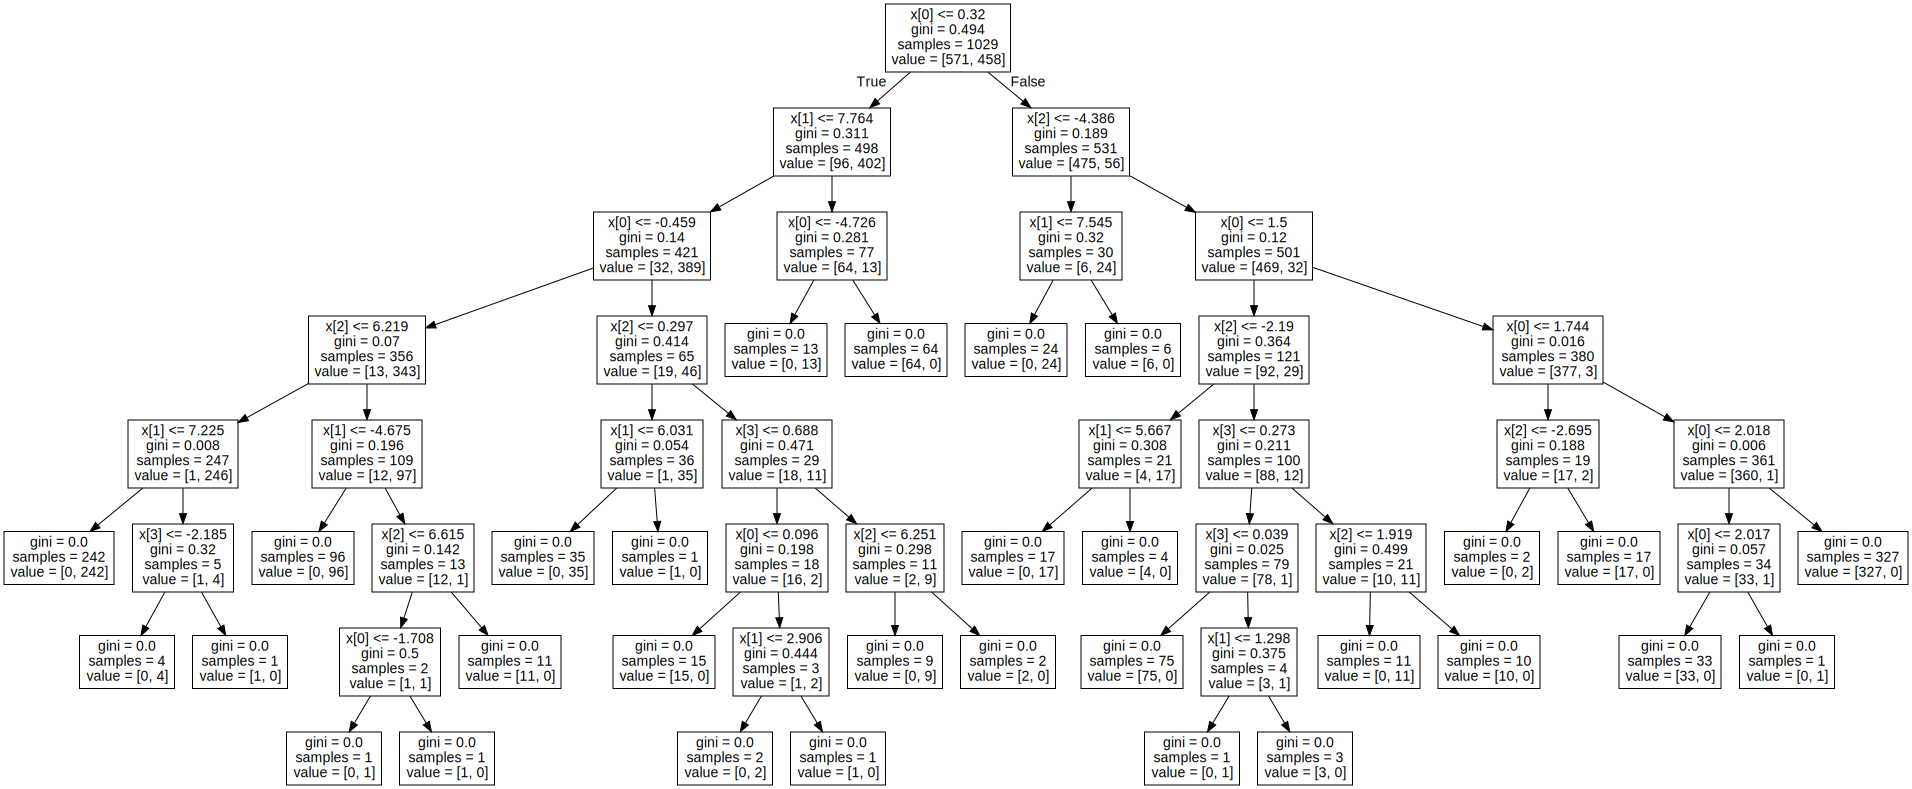

In [20]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [21]:
target_predicted = model.predict(predictors_test)

# Avaliação


*   Comparação entre as predições com os dados reais.




Posição predita

In [22]:
target_predicted[0:5]

array([0, 0, 0, 0, 1])

In [23]:
target_predicted.shape

(343,)

Posição teste

In [24]:
target_test[0:5]

657     0
18      0
700     0
221     0
1219    1
Name: class, dtype: int64

In [25]:
target_test.shape

(343,)

**RMSE (raíz quadrada do erro quadrático médio)**


*  Apresenta um intervalo de valores nos quais a estimativa varia em relação ao valor real, portanto, quanto menor esse intervalo, melhor




In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.13226001425322165


 Acurácia

 * Métrica que combina a exatidão (o quão certo) e a precisão (o quanto desvia) das predições de um modelo supervisionado de classificação




In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.9825072886297376


In [30]:
print(f"{round(100 * acuracia, 2)}%")

98.25%


In [31]:
# Especifique os nomes das colunas
feature_names = bank_note_df.columns[:-1]  # Todas as colunas, exceto a última (classe)
target_name = bank_note_df.columns[-1]  # Nome da coluna de destino (classe)

In [32]:
bank_note_df.loc[1368] # Localiza a linha com index 1367 que contém uma cédula falsificada

variance   -1.38870
skewness   -4.87730
curtosis    6.47740
entropy     0.34179
class       1.00000
Name: 1368, dtype: float64

In [33]:
note = np.array([-1.38870, -4.87730, 6.47740,  0.34179])

In [34]:
note = model.predict(note.reshape(1, -1))
print(note)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


O resultado apresentado mostra que a cédula em questão é falsificada.